# Date Subset Exploration

Exploration into subsetting habitat data by date to align with satellite missions.

## Setup

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import geopandas as gpd
import contextily as cx

In [4]:
DATA_DIR = '../data/'
FIGURES_DIR = '../saved_figures/'

## Load habitat data

### OSPAR Habitats 2022

In [5]:
ospar_shp = os.path.join(DATA_DIR, 'OSPARHabitats2022_Points_mod/OSPAR2022Points.shp')

In [6]:
gdf = gpd.read_file(ospar_shp)

In [7]:
gdf.head()

,GUI,RecordKey,HabType,HabSubType,HabStatus,Determiner,DetDate,SurveyKey,StartDate,EndDate,...,DataOwner,Accuracy,Latitude,Longitude,AltHabType,AltHabClas,AltHabRel,SurveyDate,SurveyYear,geometry
0,OSPARHab2010IE1v0,10100105,Zostera beds,Unknown,Present,None,None,None,2003-07-01,2003-10-31,...,None,None,55.045203,-7.125105,None,None,None,2003-10-31,2003,POINT (-7.12511 55.0452)
1,OSPARHab2010IE1v0,10100039,Zostera beds,Zostera noltii beds,Present,L Lieberkencht,2002-08-01,None,1996-05-01,1996-12-31,...,Trinity College Dublin,None,52.669012,-9.569316,None,None,None,1996-12-31,1996,POINT (-9.56932 52.66901)
2,OSPARHab2010IE1v0,10100020,Zostera beds,Zostera noltii beds,Present,L Lieberkencht,2002-09-03,None,1996-05-01,1996-12-31,...,Trinity College Dublin,None,52.305249,-9.854169,None,None,None,1996-12-31,1996,POINT (-9.85417 52.30525)
3,OSPARHab2010IE1v0,10100013,Zostera beds,Zostera noltii beds,Present,L Lieberkencht,2002-09-04,None,1996-05-01,1996-12-31,...,Trinity College Dublin,None,52.142788,-9.943158,None,None,None,1996-12-31,1996,POINT (-9.94316 52.14279)
4,OSPARHab2010IE1v0,10100024,Zostera beds,Zostera marina beds,Present,JH Allen,2003-06-13,None,1996-05-01,1996-12-31,...,Trinity College Dublin,None,52.264474,-9.825030,None,None,None,1996-12-31,1996,POINT (-9.82503 52.26447)


In [8]:
gdf['SurveyYear'] = pd.to_datetime(gdf['SurveyDate']).dt.year

Drop points with survey date earlier than the first full year when the Sentinel-2 mission began (2016).

In [11]:
gdf_filt = gdf[(gdf['SurveyYear'] >= 2016)].reset_index(drop=True)

In [12]:
len(gdf_filt)

57038

In [13]:
(gdf_filt['HabType'] == 'Zostera beds').sum()

42327

In [14]:
(gdf_filt['HabType'] == 'Kelp forests').sum()

1113

In [15]:
all_counts = gdf['HabType'].value_counts()
filtered_counts = gdf_filt['HabType'].value_counts()

In [16]:
all_counts = all_counts.reindex(all_counts.index.union(filtered_counts.index), fill_value=0)
filtered_counts = filtered_counts.reindex(all_counts.index, fill_value=0)

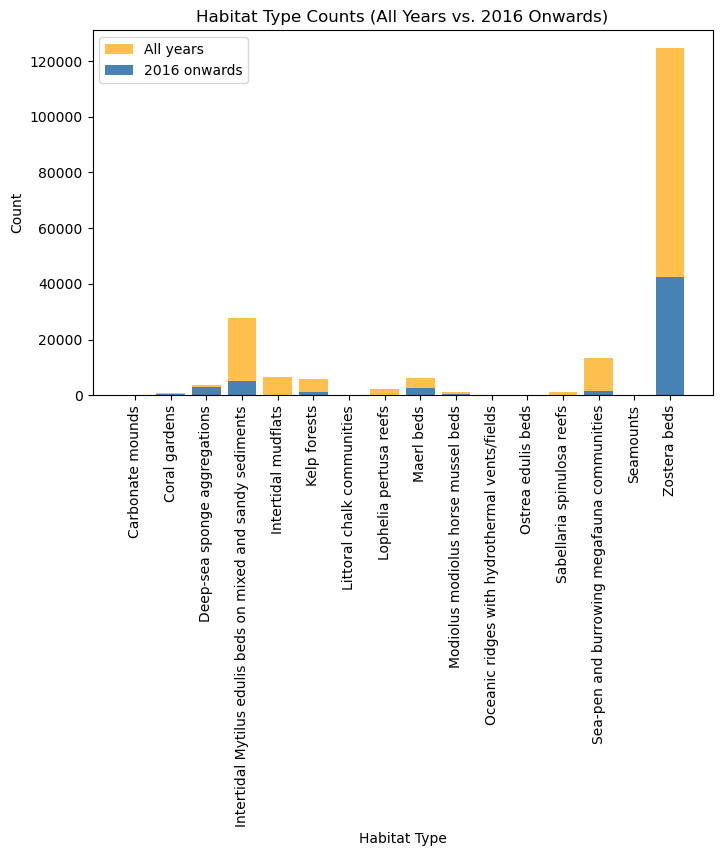

In [18]:
fig, ax = plt.subplots(figsize=(8, 5))

# Orange bars on top (all years)
ax.bar(all_counts.index, all_counts, color="orange", alpha=0.7, label="All years")

# Blue bars first (2015 onwards) so they are underneath
ax.bar(all_counts.index, filtered_counts, color="steelblue", label="2016 onwards")

# Labels and legend
ax.set_xlabel("Habitat Type")
ax.set_ylabel("Count")
ax.set_title("Habitat Type Counts (All Years vs. 2016 Onwards)")
ax.legend()
ax.tick_params(axis='x', rotation=90)

fig.subplots_adjust(bottom=0.15)
plt.savefig(os.path.join(FIGURES_DIR, 'habtype_2016_compare.png'), bbox_inches='tight')
plt.show()

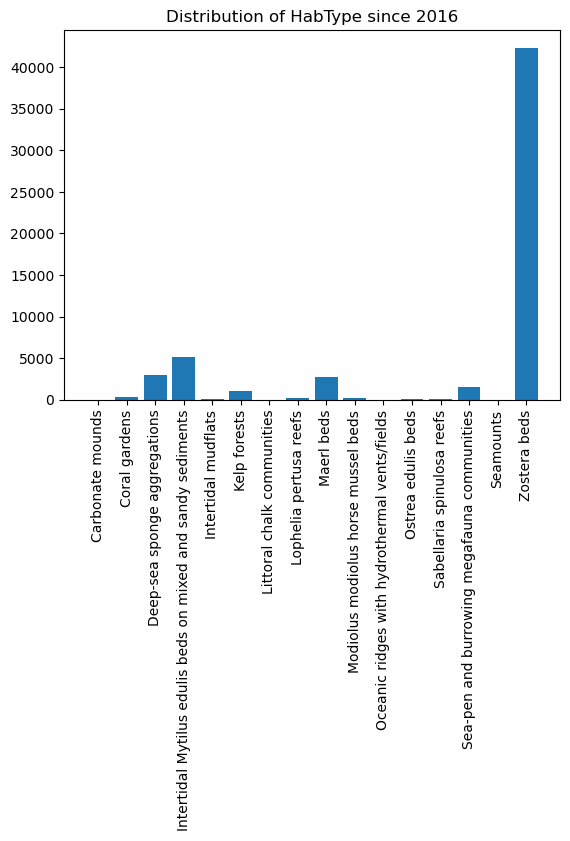

In [19]:
fig, ax = plt.subplots()
plt.bar(x=all_counts.index, height=filtered_counts)
plt.xticks(rotation=90)
plt.title('Distribution of HabType since 2016')
fig.subplots_adjust()
plt.savefig(os.path.join(FIGURES_DIR, 'habtype_2016.png'), bbox_inches='tight')
plt.show()

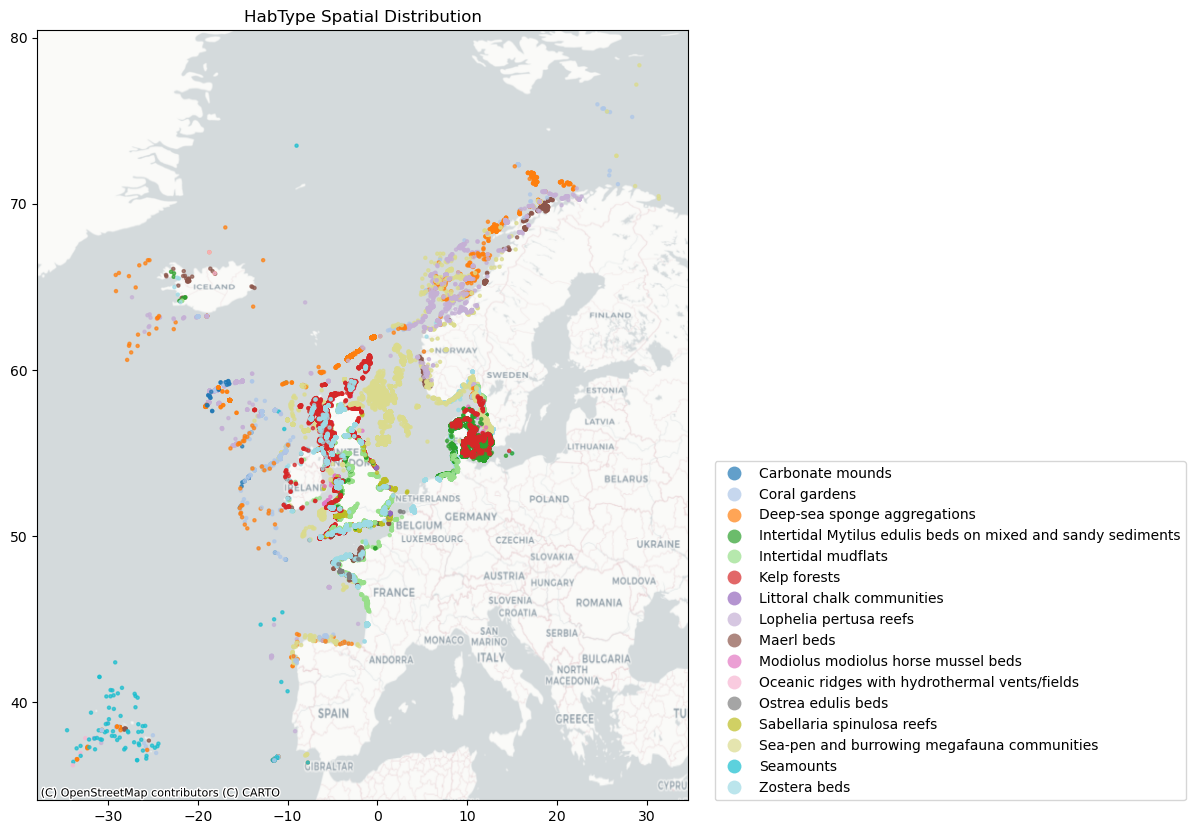

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(ax=ax, column=gdf["HabType"], cmap='tab20', markersize=5, alpha=0.7,
         legend=True, categorical=True, legend_kwds={'loc': (1.04, 0)})

ax.set_title("HabType Spatial Distribution")
cx.add_basemap(ax, crs=gdf.crs, source=cx.providers.CartoDB.Positron)

plt.show()

In [21]:
kelp_gdf = gdf[gdf['HabType'] == 'Kelp forests']
kelp_filt = gdf_filt[gdf_filt['HabType'] == 'Kelp forests']

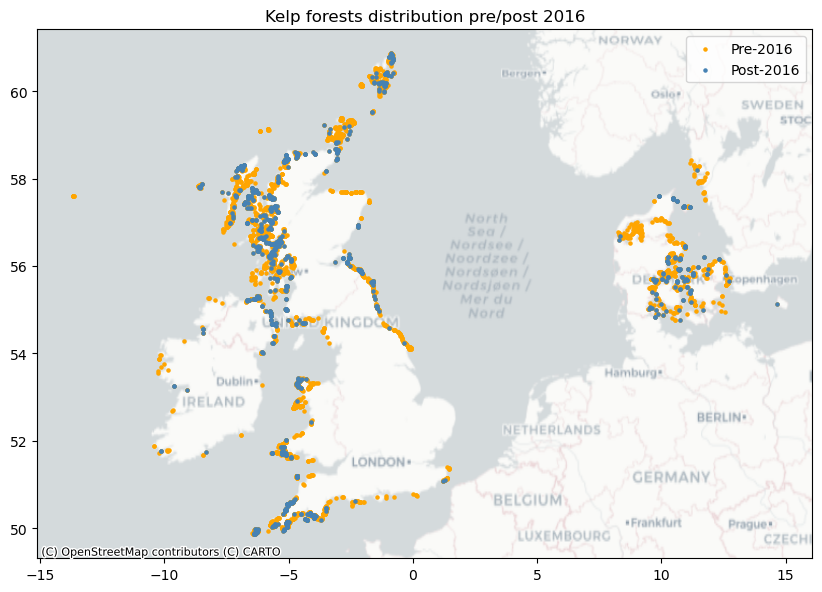

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))

pre2015 = kelp_gdf.plot(ax=ax, color='orange', markersize=5, label='Pre-2016')
post2015 = kelp_filt.plot(ax=ax, color='steelblue', markersize=5, label='Post-2016')

ax.set_title("Kelp forests distribution pre/post 2016")
ax.legend()
cx.add_basemap(ax, crs=gdf.crs, source=cx.providers.CartoDB.Positron)
plt.savefig(os.path.join(FIGURES_DIR, 'kelp_2016_map.png'))
plt.show()